In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings ('ignore')
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC

%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
# Check for null values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

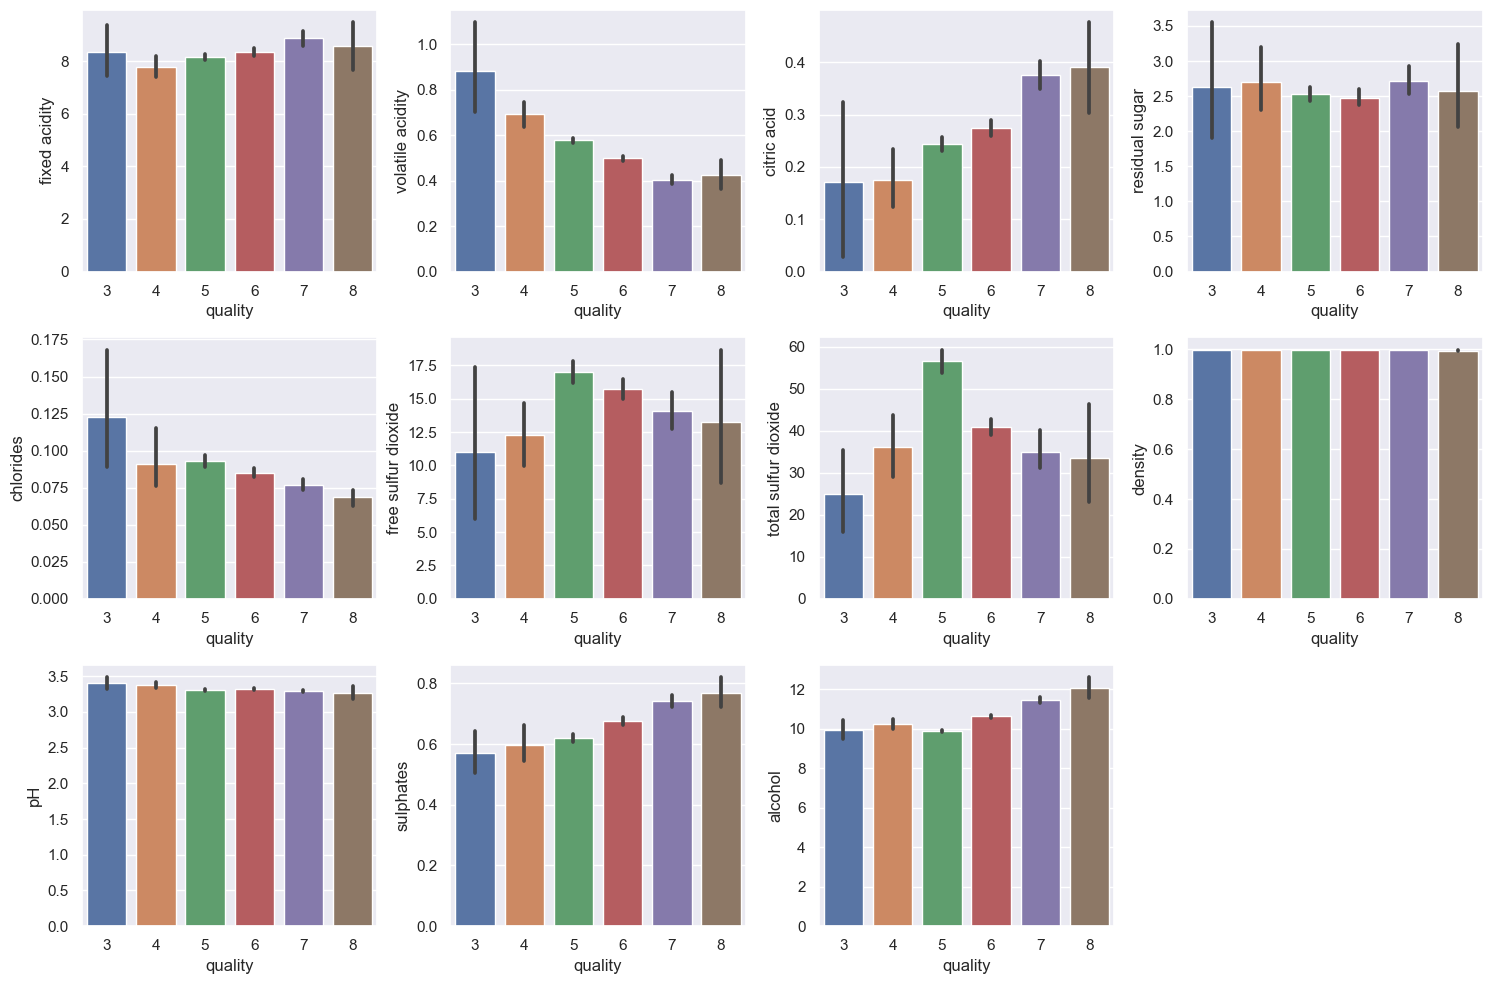

In [8]:
fig = plt.figure(figsize=(15,10))

plt.subplot(3,4,1)
sns.barplot(x='quality',y='fixed acidity',data=df)

plt.subplot(3,4,2)
sns.barplot(x='quality',y='volatile acidity',data=df)

plt.subplot(3,4,3)
sns.barplot(x='quality',y='citric acid',data=df)

plt.subplot(3,4,4)
sns.barplot(x='quality',y='residual sugar',data=df)

plt.subplot(3,4,5)
sns.barplot(x='quality',y='chlorides',data=df)

plt.subplot(3,4,6)
sns.barplot(x='quality',y='free sulfur dioxide',data=df)

plt.subplot(3,4,7)
sns.barplot(x='quality',y='total sulfur dioxide',data=df)

plt.subplot(3,4,8)
sns.barplot(x='quality',y='density',data=df)

plt.subplot(3,4,9)
sns.barplot(x='quality',y='pH',data=df)

plt.subplot(3,4,10)
sns.barplot(x='quality',y='sulphates',data=df)

plt.subplot(3,4,11)
sns.barplot(x='quality',y='alcohol',data=df)

plt.tight_layout()

In [9]:
# Good or Bad Quality
bins = (2,6.5,8)
groups = ['bad','good']
df['quality'] = pd.cut(df['quality'], bins=bins, labels=groups)

In [10]:
le = LabelEncoder()
df['quality'] = le.fit_transform(df['quality'])
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [11]:
df['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

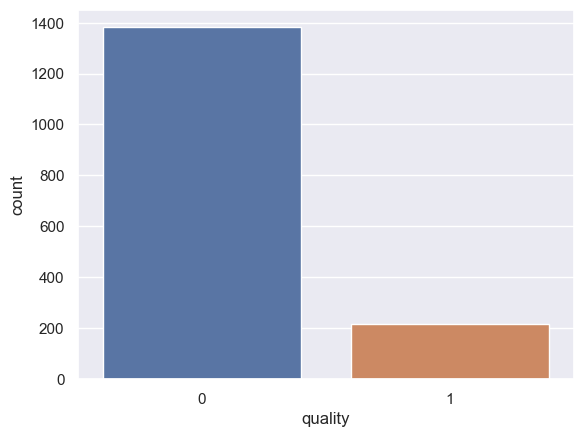

In [12]:
sns.countplot(df['quality'])

In [13]:
# Seperating data

x = df.drop('quality', axis=1)
y = df['quality']

In [14]:
# Training data and testing data

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [15]:
sc = StandardScaler()

In [16]:
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [17]:
# Random Forest Classifier

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(x_train, y_train)
pred_rfc = rfc.predict(x_test)

In [30]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.89      0.96      0.93       273
           1       0.62      0.34      0.44        47

    accuracy                           0.87       320
   macro avg       0.75      0.65      0.68       320
weighted avg       0.85      0.87      0.86       320



In [18]:
print(confusion_matrix(y_test, pred_rfc))

[[264   9]
 [ 30  17]]


In [19]:
# Stochastic Gradient Decent Classifier

sgd = SGDClassifier(penalty=None)
sgd.fit(x_train, y_train)
pred_sgd = sgd.predict(x_test)

In [20]:
print(classification_report(y_test, pred_sgd))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92       273
           1       0.40      0.09      0.14        47

    accuracy                           0.85       320
   macro avg       0.63      0.53      0.53       320
weighted avg       0.79      0.85      0.80       320



In [21]:
print(confusion_matrix(y_test, pred_sgd))

[[267   6]
 [ 43   4]]


In [22]:
# Support Vector Classifier

svc = SVC()
svc.fit(x_train, y_train)
pred_svc = svc.predict(x_test)

In [23]:
print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.71      0.26      0.37        47

    accuracy                           0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320

